<center><h1> Reinforcement Learning Lab Problem Sheet - 4 - Influence Maximization</h1></center>
<hr><font size=4>
Viral marketing aims to leverage a social network to spread awareness about a specific
product in the market through information propagation via word-of-mouth. Specifically, the
marketer aims to select a fixed number of ‘influential’ users (called seeds) who will influence
other users in the social network. This will result in information propagating through the
network as an increasing number of users adopt or become aware of the product. The goal is
to maximize the spread of this influence, and this problem is referred to as influence
maximization (IM)</font>
<br>

## I . Model it as MAB.
1. In each of the T rounds, a superarm A (a set of seeds with cardinality k) is played,which triggers arms in A and also other arms. Let pi J denote the triggering probability of arm i if arm j is played.
2. In each trial an influence budget, b, [0 1] is generated. An arm ‘i’ is considered influenced by superarm A’, if p <sub>i</sub> <sup>A</sup> > b [triggering probability of superarm A > b]. <br>
3. The total number of users influenced is taken as the reward of the arm (seed).
<br>

## II. Identify optimal seeds according to the following algorithms
1. Greedy algorithm
2. UCB1

In [ ]:
#Importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
class Arm:
  '''
  Class to define the nature of arm
  reward distribution etc
  '''
  def __init__(self,mean=None,std=None,distribution=None):
    '''
    Constructor function to define class members
    :params None
    :return None
    '''
    self.Qt = 0 #running average of the rewards
    self.t = 0 #tracking the time steps
    self.state = 0

  def simulate(self,reward):
    '''
    Simulate trials for arm
    :params None
    :return None
    '''
    #updating the running average and time steps
    self.Qt = self.Qt + ((1/(self.t+1))*(reward - self.Qt))
    self.t +=1

## Greedy Algorithm

In [ ]:
def greedy_algorithm(num_arms,k,time_steps):
  #creating objects aka initalising reward dstribution to each arm
  bandit_arms = []
  for arm in range(num_arms):
    bandit_arms.append(Arm())

  graph_prob = np.random.uniform(0,1,(num_arms,num_arms))

  super_arms = list(combinations(bandit_arms, k))
  super_arm_dic,super_arm_counter = {},{}

  for i in super_arms:
    super_arm_dic[i] = 0
    super_arm_counter[i] = 0

  #maintaining the count of each arm is picked to ensure The number of pulls for any two arms will never differ by more than 1.
  count_tracker = {}
  for arm in range(len(super_arms)):
    count_tracker[arm] = 0

  for time_step_i in range(time_steps):
    count_influenced = k
    bt = np.random.uniform(0,1)

    if time_step_i == 0: #at time step zero i choose a superarm randomly
      sp_arm = random.choice([i for i in range(len(super_arms))])
      n_k = list(set(bandit_arms)-set(super_arms[sp_arm]))

      for sparm in super_arms[sp_arm]:
        for subarm in n_k:
          if subarm.state!=1 and graph_prob[bandit_arms.index(sparm)][bandit_arms.index(subarm)]>bt:
            subarm.state = 1
            count_influenced+=1

      super_arm_dic[super_arms[sp_arm]]=count_influenced
      super_arm_counter[super_arms[sp_arm]] += 1
      count_tracker[sp_arm] += 1

      for sarm in bandit_arms:
        sarm.state=0
      indiced = []
      for idx in super_arms[sp_arm]:
        indiced.append(bandit_arms.index(idx))
      print(list(super_arm_counter.values()))
      print("At time step 0 choosenn super arm is:",indiced,"its influence is:", super_arm_dic[super_arms[sp_arm]]-count_influenced)
    else: #for all other time steps i choose the arm with max qt - greedy strategy
      Qt_arms = np.array([0 if super_arm_counter[sarm]==0 else super_arm_dic[sarm]/super_arm_counter[sarm] for sarm in super_arm_dic])
      max_Qt_idx = np.argmax(Qt_arms)

      #if all the arm played then set them to 0
      if sum(list(count_tracker.values())) == len(super_arms):
        for sarm in range(len(super_arms)):
          count_tracker[sarm] = 0

      #if the max qt is already picked then choose any other arm randomly
      #in order to avoid number of pulls for any two arms will differing by more than 1.
      elif count_tracker[max_Qt_idx] == 1:
        while count_tracker[max_Qt_idx]==1:
          max_Qt_idx = random.choice([i for i in range(len(super_arms))])

      n_k = list(set(bandit_arms)-set(super_arms[max_Qt_idx]))

      for sparm in super_arms[max_Qt_idx]:
        for subarm in n_k:
          if subarm.state!=1 and graph_prob[bandit_arms.index(sparm)][bandit_arms.index(subarm)]>bt:
            subarm.state = 1
            count_influenced+=1

      super_arm_dic[super_arms[max_Qt_idx]]+=count_influenced
      super_arm_counter[super_arms[max_Qt_idx]] += 1
      count_tracker[max_Qt_idx] += 1

      for sarm in bandit_arms:
        sarm.state=0
      indiced = []
      for idx in super_arms[max_Qt_idx]:
        indiced.append(bandit_arms.index(idx))
      print(list(super_arm_counter.values()))
      print(list(super_arm_dic.values()))
      print("At time step",time_step_i," choosenn super arm is:",indiced,"its influence is:", count_influenced)

  mx = 0
  mx_ele = None
  for sarm in super_arms:
    if mx<super_arm_dic[sarm]/super_arm_counter[sarm]:
      mx =  super_arm_dic[sarm]/super_arm_counter[sarm]
      mx_ele = sarm
  optimal = []
  for idx in mx_ele:
    optimal.append(bandit_arms.index(idx))

  print("-"*20)
  print("Optimal seed is:",optimal)
  print("-"*20)
  return graph_prob,[super_arm_dic[sarm]/super_arm_counter[sarm] for sarm in super_arms]

In [ ]:
num_arms   = [3]
k = 100 #on total we have 10,000 users
time_steps = 100

result = {}
for i in num_arms:
  graph_prob,res = greedy_algorithm(6,2,time_steps)
  print(res)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [1, 2] its influence is: 0
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 1  choosenn super arm is: [0, 4] its influence is: 6
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 4, 0]
At time step 2  choosenn super arm is: [3, 5] its influence is: 4
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 6, 5, 6, 0, 0, 0, 0, 0, 0, 0, 4, 0]
At time step 3  choosenn super arm is: [0, 5] its influence is: 5
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 6, 5, 6, 0, 2, 0, 0, 0, 0, 0, 4, 0]
At time step 4  choosenn super arm is: [1, 4] its influence is: 2
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 6, 5, 6, 0, 2, 0, 0, 4, 0, 0, 4, 0]
At time step 5  choosenn super arm is: [2, 4] its influence is: 4
[1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[4, 0, 0, 6, 5, 6, 0, 2, 0, 0, 4, 0, 0, 4, 0]
At time

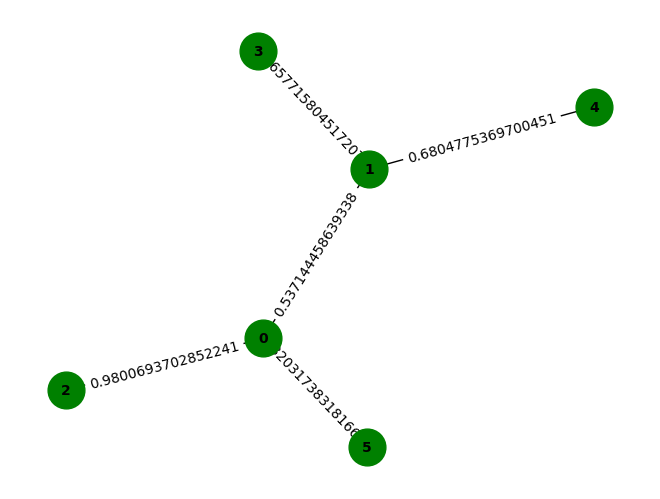

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

adjacency_matrix = np.array(graph_prob)
G = nx.Graph()

num_nodes = len(adjacency_matrix)
G.add_nodes_from(range(6))

for i in range(6):
    for j in range(i+1, 6):
        if adjacency_matrix[i, j] >= 0.5:
            G.add_edge(i, j, weight=adjacency_matrix[i, j])

pos = nx.spring_layout(G)
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='green', font_color='black', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
plt.show()

## UCB1 Algorithm

In [ ]:
def UCB1(num_arms,k,c,graph_prob,time_steps):
  probabilty_sub_arms = np.random.uniform(0,1,(num_arms,k))
  bandit_arms = []
  for arm in range(num_arms):
    bandit_arms.append(Arm())

  #graph_prob = np.random.uniform(0,1,(num_arms,num_arms))

  super_arms = list(combinations(bandit_arms, k))
  super_arm_dic,super_arm_counter = {},{}

  for i in super_arms:
    super_arm_dic[i] = 0
    super_arm_counter[i] = 0

  #maintaining the count of each arm is picked to ensure The number of pulls for any two arms will never differ by more than 1.
  count_tracker = {}
  for arm in range(len(super_arms)):
    count_tracker[arm] = 0

  for time_step_i in range(time_steps):
    bt = np.random.uniform(0,1)
    count_influenced = k
    if time_step_i == 0: #at time step zero i choose a arm randomly
      for sp_arm in [i for i in range(len(super_arms))]:
        n_k = list(set(bandit_arms)-set(super_arms[sp_arm]))
        for sparm in super_arms[sp_arm]:
          for subarm in n_k:
            if subarm.state!=1 and graph_prob[bandit_arms.index(sparm)][bandit_arms.index(subarm)]>bt:
              subarm.state = 1
              count_influenced+=1

        super_arm_dic[super_arms[sp_arm]]=count_influenced
        super_arm_counter[super_arms[sp_arm]] += 1
        count_tracker[sp_arm] += 1

        for sarm in bandit_arms:
          sarm.state=0
        indiced = []
        for idx in super_arms[sp_arm]:
          indiced.append(bandit_arms.index(idx))
        print(list(super_arm_counter.values()))
        print("At time step 0 choosenn super arm is:",indiced,"its influence is:", super_arm_dic[super_arms[sp_arm]]-count_influenced)

    else: #for all other time steps i choose the arm with max qt - greedy strategy
      Qt_arms = np.array([0 if super_arm_counter[sarm]==0 else super_arm_dic[sarm]/super_arm_counter[sarm] for sarm in super_arm_dic])
      for i in range(len(Qt_arms)):
        Qt_arms[i] = Qt_arms[i] + c*((np.log(time_step_i+15)/super_arm_counter[super_arms[i]])**0.5)

      max_Qt_idx = np.argmax(Qt_arms)
      n_k = list(set(bandit_arms)-set(super_arms[max_Qt_idx]))

      for sparm in super_arms[max_Qt_idx]:
        for subarm in n_k:
          if subarm.state!=1 and graph_prob[bandit_arms.index(sparm)][bandit_arms.index(subarm)]>bt:
            subarm.state = 1
            count_influenced+=1

      super_arm_dic[super_arms[max_Qt_idx]]+=count_influenced
      super_arm_counter[super_arms[max_Qt_idx]] += 1
      count_tracker[max_Qt_idx] += 1

      for sarm in bandit_arms:
        sarm.state=0
      indiced = []
      for idx in super_arms[max_Qt_idx]:
        indiced.append(bandit_arms.index(idx))
      print(list(super_arm_counter.values()))
      print(list(super_arm_dic.values()))
      print("At time step",time_step_i," choosenn super arm is:",indiced,"its influence is:", count_influenced)
  mx = 0
  mx_ele = None
  for sarm in super_arms:
    if mx<super_arm_dic[sarm]/super_arm_counter[sarm]:
      mx =  super_arm_dic[sarm]/super_arm_counter[sarm]
      mx_ele = sarm
  optimal = []
  for idx in mx_ele:
    optimal.append(bandit_arms.index(idx))

  print("-"*20)
  print("Optimal seed is:",optimal)
  print("-"*20)
  return graph_prob,[super_arm_dic[sarm]/super_arm_counter[sarm] for sarm in super_arms]

In [ ]:
time_steps = 100
c = 0.3
graph_prob,res = UCB1(6,2,c,graph_prob,time_steps)
print(res)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [0, 1] its influence is: 0
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [0, 2] its influence is: 0
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [0, 3] its influence is: 0
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [0, 4] its influence is: 0
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [0, 5] its influence is: 0
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [1, 2] its influence is: 0
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [1, 3] its influence is: 0
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [1, 4] its influence is: 0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
At time step 0 choosenn super arm is: [1, 5] its influence is: 0
[

<hr>
<hr>
<hr>